In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.integrate as spint
import scipy.interpolate as spinterp

'''Karan Kumar 14906619'''

'Karan Kumar 14906619'

# Statistical Methods - Assignment 1

All assignments are graded following the rubric on Canvas. In short, we are grading under the followings aspects: complete solution, explanation of assumptions, explanation of solution, clearness of plots, coding practices.

## Assignment 1:

|          |   Task 1    |    Task 2   |    Task 3   |    Task 4   |     Sum    |
|:--------:|:-----------:|:-----------:|:-----------:|:-----------:|:----------:|
| Solution |   3.5/ 5    |   4 / 5     |   2.5/ 5    |    2   / 5  |  12  / 20  |

- General comments: You managed to finish most of the assignment, but there is enough to improve. Please use full sentences when explaining what you have done or have observed. Also, clearly state assumptions and check if they are valid when doing a statistical test. In terms of coding: the last task was not working and I did not get it to work after trying for a while, so please make sure your code works. Also, the difference between a uniform and normal distribution is very important, so please check that next time as well.

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
#print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
stars.columns


Index(['Name', 'ID', 'GaiaDR3', 'inrt', 'Prob', 'RAdeg', 'e_RAdeg', 'DEdeg',
       'e_DEdeg', 'GLON', 'GLAT', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx',
       'e_Plx', 'pscol', 'e_pscol', 'PlxpmRACor', 'PlxpmDECor', 'pmRApmDECor',
       'PlxpscolCor', 'pmRApscolCor', 'pmDEpscolCor', 'Solved', 'ELAT',
       'nueff', 'RUWE', 'FidelityV1', 'FG', 'e_FG', 'FBP', 'e_FBP', 'FRP',
       'e_FRP', 'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'BP-G', 'G-RP', 'RV',
       'e_RV', 'n_RV', 'o_RV', 'o_RVd', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag',
       'Vbroad', 'e_Vbroad', 'o_Vbroad', 'VarFlag', 'NSS', 'RVS'],
      dtype='object')

Filter stars by high proability P > 0.8

In [4]:
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()

# Q1 Method and Assumptions
Group the clusters and respective stars by their name <br>
Use pandas built in functions to calculate means and standard deviations <br>
For the proper motion, calculate as quadrate which i interperate as the magnitude of a vector <br>
Return the parameters as a dataframe for each cluster

## Assumptions:
The Mean proper motion is calculated as a magnitude <br>
There are no Nan values in the dataset <br>
The cluster size units are in degrees like RA and DEC

*Niek: what do you mean by "The Mean proper motion is calculated as a magnitude"? Magnitude is a very different parameter.*

In [5]:
def per_cluster(hiprob_data):
    '''Calculate 6 parameters of  cluster
    n - number of stars in a cluster
    omega- mean parallax of the cluster
    sigma - standard deviation of the paralax
    size - size of cluster
    proper_motion_mag- mean proper motion of cluster
    proper_motion_std - standard deviaion of the propermotion

    
    input:
    hiprob_data - pd dataframe of stars with high probability 
    
    variables:
    filtered_dataframe - pd dataframe append parameters into and return
    clusters- find all the clusters in the dataframe with a common name
    
    return 
    filtered dataframe with 6 calculated parameters per cluster'''
    
    #find the unique cluster names in the dataframe
    filtered_dataframe = pd.DataFrame()
   #group each cluster by its name
    #all operations should applied on this variable name
    clusters = hiprob_data.groupby('Name') #so i don't have to keep writing this
    
    n  = clusters.size()
    filtered_dataframe['Counts'] = n

    plx_method = clusters['Plx'].mean()
    filtered_dataframe['Mean plx'] = plx_method

    plx_std = clusters['Plx'].std(numeric_only=True)
    filtered_dataframe['Plx std'] = plx_std

    size = np.sqrt(clusters['RAdeg'].std()**2  + clusters['DEdeg'].std()**2)
    filtered_dataframe["Cluster Size"] = size

    proper_motion_mag = (clusters['pmRA'].mean())**2 + (clusters['pmDE'].mean())**2
   # proper_motion_mag = #clusters['pmRA'].transform(lambda x:x**2)  + clusters['pmDE'].transform(lambda y:y**2)
    proper_motion_mag = np.sqrt(proper_motion_mag)
    filtered_dataframe["Mean PM" ] = proper_motion_mag

    proper_motion_std = np.sqrt(clusters['pmRA'].std()**2  + clusters['pmDE'].std()**2)
    filtered_dataframe["PM Std"] = proper_motion_std
    
    return filtered_dataframe
cluster_analysis = per_cluster(stars_hiprob)
#i get a warning becuase im running operations on a copy of a original dataframe, but it still works
cluster_analysis


,Counts,Mean plx,Plx std,Cluster Size,Mean PM,PM Std
Name,,,,,,
1636-283,30,0.126939,0.034519,0.050512,6.650466,0.240161
ADS_16795,41,4.759659,0.101591,5.438194,18.871288,1.810880
AH03_J0748+26.9,28,0.210004,0.017010,0.045579,4.025658,0.048521
ASCC_100,87,2.748023,0.091920,1.240143,3.863448,0.557090
ASCC_101,149,2.517671,0.088908,1.027157,1.595839,0.444430
...,...,...,...,...,...,...
vdBergh_152,25,2.674800,0.029313,0.886879,5.349199,0.444215
vdBergh_80,93,1.001419,0.053363,0.425505,3.299538,0.375063
vdBergh_83,92,1.041742,0.095341,0.347059,4.355737,0.277022


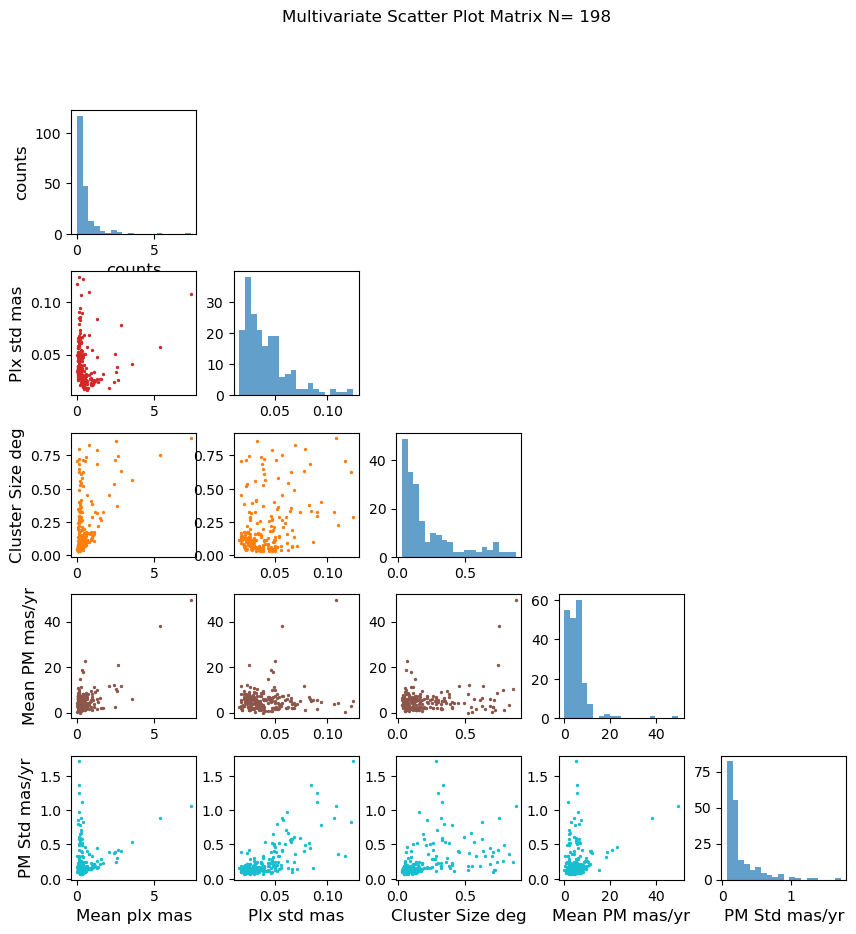

In [6]:
def scatter_matrix(cluster):
    '''Create a mulitvariate matrix of a dataframe of clusters
    
     i took all of this code from my first assignment submission
     and modified it to read the data for this assignment.

     input:
     cluster- dataframe of star clusters

     variables:
     data - df column, parameters to plot
     labels- axes labels, also related to parameters to plot
     return
     multivariate scatter matrix of parameters from data 
    '''
    
    counts = 200
    max_val = 1.0 
    #filter clusters by counts and size
    cluster = cluster[cluster['Counts'] > 200]
    cluster = cluster[cluster['Cluster Size'] < 1.0]
    #ignore counts column
    labels= cluster.columns[1:] 
    units = ['mas', 'mas','deg','mas/yr','mas/yr'] # add units to the labels
    data = [cluster['Mean plx'], cluster['Plx std'], cluster['Cluster Size'], cluster['Mean PM'], cluster['PM Std']]
    ndims = len(data)
    fig, axes = plt.subplots(5,5,figsize=(10,10))
    fig.subplots_adjust(wspace=0.3,hspace=0.3)
    fig.suptitle("Multivariate Scatter Plot Matrix N= "+str(len(cluster)))
    colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:brown', 'tab:cyan']
    for i in range(ndims): ## y dimension of grid
        for j in range(ndims): ## x dimension of grid
            if i == j:
                axes[i,j].hist(data[i], bins=20,alpha=0.7,)
            elif i > j:
                axes[i,j].scatter(data[j], data[i],s=2, color=colors[i])
            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_xlabel('counts',fontsize=12)
                    axes[i,j].set_ylabel('counts',fontsize=12)
                else:
                    axes[i,j].set_ylabel(labels[i]+' '+units[i],fontsize=12)
            if i == 4:
                axes[i,j].set_xlabel(labels[j]+' '+units[j],fontsize=12)    
    #fig.legend(labels=labels)
    plt.show()
    return cluster
cluster_analysis = scatter_matrix(cluster_analysis)

# Visual Correlations
Here im just looking for linear trends by eye starting from the bottom row, looking up <br>
Mean plx and Mean PM, Cluster Size <br>
Plx std and PM std, Mean PM <br>
Cluster size and PM std, Mean PM

*Niek: please use full sentences to describe what you see in the plot. Also, how do you think you can improve the clarity of the plot? (log-scaled axes)*

In [7]:
cluster_analysis# filtered clusters

,Counts,Mean plx,Plx std,Cluster Size,Mean PM,PM Std
Name,,,,,,
BH_131,227,0.125637,0.046214,0.221680,6.536827,0.154404
BH_140,338,0.190195,0.043486,0.127424,14.897046,0.129645
BH_66,355,0.123089,0.044962,0.180838,5.470541,0.229493
Berkeley_36,217,0.217359,0.065872,0.063243,1.967901,0.099389
Berkeley_39,211,0.226982,0.038289,0.045639,2.371439,0.068647
...,...,...,...,...,...,...
UBC_461,231,0.298768,0.031775,0.419239,4.096675,0.109858
UBC_517,256,0.405671,0.022682,0.716871,5.685520,0.127498
UBC_600,390,0.171171,0.039550,0.721515,1.191558,0.134289


I've filtered down to 198 clusters

In [8]:
def correlation(df_col1, df_col2):
    '''Calculate a pearson r and spearman rho correlation' for two dataframe columns
    '''
    r_val, p_val_r = sps.pearsonr(df_col1, df_col2)
    rho_val, p_val_rho = sps.spearmanr(df_col1, df_col2)
    return r_val, p_val_r, rho_val, p_val_rho

#i did the enumerate loop and asked chatgpt how to print everything to 4 sig digits

for i, cols1 in enumerate(cluster_analysis.columns[1:]): #skip counts column
    for j, cols2 in enumerate(cluster_analysis.columns[1:]):
        if i < j :
            pearson_corr, pearson_p_value, spearman_corr, spearman_p_value = correlation(cluster_analysis[cols1], cluster_analysis[cols2])
            print(f"{cols1} vs {cols2}: Pearson Correlation = {pearson_corr:.4f} (p-value = {pearson_p_value}), Spearman Correlation = {spearman_corr:.4f} (p-value = {spearman_p_value})")


Mean plx vs Plx std: Pearson Correlation = 0.0476 (p-value = 0.5053546796705094), Spearman Correlation = -0.3762 (p-value = 4.712016719689901e-08)
Mean plx vs Cluster Size: Pearson Correlation = 0.4766 (p-value = 1.2759291980334748e-12), Spearman Correlation = 0.3736 (p-value = 5.8970560488021756e-08)
Mean plx vs Mean PM: Pearson Correlation = 0.6685 (p-value = 5.222065852850302e-27), Spearman Correlation = 0.0513 (p-value = 0.4729721146639403)
Mean plx vs PM Std: Pearson Correlation = 0.2285 (p-value = 0.0012062465572070774), Spearman Correlation = 0.0252 (p-value = 0.7242272544725276)
Plx std vs Cluster Size: Pearson Correlation = 0.3413 (p-value = 8.62171156339053e-07), Spearman Correlation = 0.2088 (p-value = 0.003160198292861663)
Plx std vs Mean PM: Pearson Correlation = 0.1291 (p-value = 0.06980530934801221), Spearman Correlation = -0.0134 (p-value = 0.8513928555765554)
Plx std vs PM Std: Pearson Correlation = 0.7130 (p-value = 4.7609372509092704e-32), Spearman Correlation = 0.60

*Niek: it is fine to use ChatGPT to help you coding, but the p-values should then also be printed in 4 s.f.*

# Q2
## A
You can improve the situation by performing the tests on log-transformed data (i.e. on the
logarithm of the quantities instead of the original values). Why should this make the tests
more reliable? Finally, comment on your results and their implications

## B
Log transforming would reduce the problem of mulitplying over small floats for both tests. Multiplying the terms in each correlation test for small values is computatuionally difficult and long especially for large datapoints. Logspacing the data would make it more reliable because you reduce multipication error and computational time

For each Correlation a value of [-1,1] is assigned to the test. ) 0 is no correlation, -1 is negative correlation i.e. as x increases, y decreases. +1 is posiitive correlation.as x increases, y increases. Pearson-r looks for a linear relation. Spearman-rho looks for monotonic relation.

Each correlation test calculates a null hypothesis that the data is unrelated. A low p value means we can confidently reject the null hypothesis

*Niek: the log tranformation makes the distributions less skewed and more symmetric and normal-looking, which increases the validity of the r and rho correlation tests. Also, what is your significance threshold?*


## Spearman $\rho$
Values with a monotonic correlation and high confidence 
<ol>
  <li>Mean plx and Mean PM.</li>
  <li>Plx std and PM std</li>
    <li>Cluster Size and PM std</li>
</ol>

## Pearson R
Values with a linear correlation and high confidence
<ol>
  <li>Mean plx and Mean Cluster Size</li>
  <li>Mean plx and Mean PM </li>
    <li>Mean plx and PM std</li>
    <li>Plx std and Cluster size</li>
    <li>Plx std and PM std</li>
    <li>Cluster size and PM std</li>
    <li>Mean PM and PM std</li>
</ol>

### Explanation
Spearman $\rho$ tells us that monotonically realted variables can also be linearly related by Pearson r. But not naviely the other way around. The mean plx correlations make sense since we rely on parallax to make these measurements
### Assumptions for Correlation test
Clusters with sample size 200 < n < 500 are normally distributed <br>
the data is independent and identially distributed <br>
Identically distriubed - The star data does not follow a trend, and selecting one star does not affect the measurement of another star <br>
Independent - The information from one star or cluster does not relate or influence anther star or cluster

*Niek: good that you state the assumptions, but would you say that all the cluster parameters are normally distributed?*

In [9]:
stars.columns

Index(['Name', 'ID', 'GaiaDR3', 'inrt', 'Prob', 'RAdeg', 'e_RAdeg', 'DEdeg',
       'e_DEdeg', 'GLON', 'GLAT', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Plx',
       'e_Plx', 'pscol', 'e_pscol', 'PlxpmRACor', 'PlxpmDECor', 'pmRApmDECor',
       'PlxpscolCor', 'pmRApscolCor', 'pmDEpscolCor', 'Solved', 'ELAT',
       'nueff', 'RUWE', 'FidelityV1', 'FG', 'e_FG', 'FBP', 'e_FBP', 'FRP',
       'e_FRP', 'Gmag', 'BPmag', 'RPmag', 'BP-RP', 'BP-G', 'G-RP', 'RV',
       'e_RV', 'n_RV', 'o_RV', 'o_RVd', 'GRVSmag', 'e_GRVSmag', 'o_GRVSmag',
       'Vbroad', 'e_Vbroad', 'o_Vbroad', 'VarFlag', 'NSS', 'RVS'],
      dtype='object')

In [10]:

def realitstic_prior(d):
    '''Calculate an exponetial prior for distance'''
    L = 1.0
    return (d**2)*np.exp(-d/L)

# Probability Distribution Function
I want to calculate a fit to the model parameters of parallax assuming a normal distribution
$$P(\theta)| D) = \frac{P(D| \theta)P(\theta)}{P(D)} $$
Where $P(\theta) = Constant$ or the exporential term in the assignment given by the function realistic_prior and $P(D | \theta) $ is a normal distribution

$$P(D| \theta) = \frac{exp{\frac{-x-\mu)^2}{2\sigma^2}}}{\sqrt{2\pi\sigma^2}}$$
Where $\mu$ and $\sigma^2$ are the mean and standard deviation of the parallax respectivley. For the analysis this is converted to distance in kpc. And the denominator term
$$P(D) = \int P(D| \theta)P(\theta)$$ 


*Niek: I understand you want to derive the expressions in this way, but there are some mistakes in there. If I understand correctly, D is the distance you want to measure (the model) and $\theta$ are your data. If that is the case, you swapped them in your definition for the posterior. Also, your likelihood definition is wrong then.*

# Method
Select a random cluster with more than 200 memebers and low std <br>
Derive the distance to each star in the cluster as well as the meand and std dev <br>
calculate the posterior in two cases, uniform prior and exponential prior
return the two posteriors <br>

## One important note
I use normal and uniform interchangably in my code variable names, i know they are not the same thing, but it's bad habit of mine, <br> You may see code that looks like its calculating  a normal quanity when its uniform, But the best way to understand is from the Probability Distribution theory i wrote above. sorry

*Niek: good to know, but I believe this is something you can easily prevent by going through your code once more, maybe with Ctrl+f.*

## Assumptions
$P(D| \theta)$ is a normal distribution <br>
$\theta$ includes the mean and standard deviation of the distance <br>
The distance to the cluster comes from the stars within the cluster and calculate by thier mean <br>
The uniform prior is divided out because it's a constant in the posterior so its choice is arbitrary-  i assume its given by the mean distance <br>
For the likelyhood- the mean and standard deviation is for each individual star <br>

Central Limit theorem holds when calculating the test normal distribution and the Likelyhood one- the sample of stars is large enough<br>
Additionally for the test normal distribution the standard deviation and mean is calculated as one value for the whole cluster, not per star

*Niek: if $\theta$ is the data, the mean and standard deviation are in parallax.*

In [11]:
#get the names of all the clusters 
for names in cluster_analysis.index:
    print(names)

BH_131
BH_140
BH_66
Berkeley_36
Berkeley_39
Berkeley_43
Bochum_1
Bochum_10
Collinder_110
Collinder_261
Collinder_394
Collinder_419
Collinder_69
Czernik_41
Dolidze_32
FSR_0167
FSR_1758
FoF_145
Gulliver_15
HSC_1181
HSC_1355
HSC_1593
HSC_179
HSC_186
HSC_1890
HSC_2016
HSC_2061
HSC_2138
HSC_2359
HSC_2363
HSC_2667
HSC_280
HSC_287
HSC_2878
HSC_2879
HSC_290
HSC_2939
HSC_2950
HSC_299
HSC_31
HSC_338
HSC_358
HSC_38
HSC_561
HSC_631
HSC_639
HSC_640
HSC_647
HSC_650
HSC_655
HSC_955
IC_2714
IC_4651
IC_4725
Juchert_10
King_7
Kronberger_52
Melotte_105
Melotte_22
Melotte_66
Melotte_71
NGC_1647
NGC_1817
NGC_1851
NGC_188
NGC_1912
NGC_2099
NGC_2112
NGC_2141
NGC_2158
NGC_2168
NGC_2287
NGC_2301
NGC_2323
NGC_2345
NGC_2360
NGC_2437
NGC_2447
NGC_2477
NGC_2506
NGC_2516
NGC_2547
NGC_2548
NGC_2632
NGC_2660
NGC_2682
NGC_2808
NGC_288
NGC_3114
NGC_3201
NGC_3532
NGC_3603
NGC_362
NGC_3766
NGC_4372
NGC_4590
NGC_4755
NGC_4815
NGC_4833
NGC_5139
NGC_5272
NGC_5381
NGC_559
NGC_5617
NGC_5822
NGC_5823
NGC_5897
NGC_5904
NGC_5925

65987
[4.89886885 4.89899232 4.89911579 ... 5.51586517 5.51598864 5.51611212]
5.081979822602951


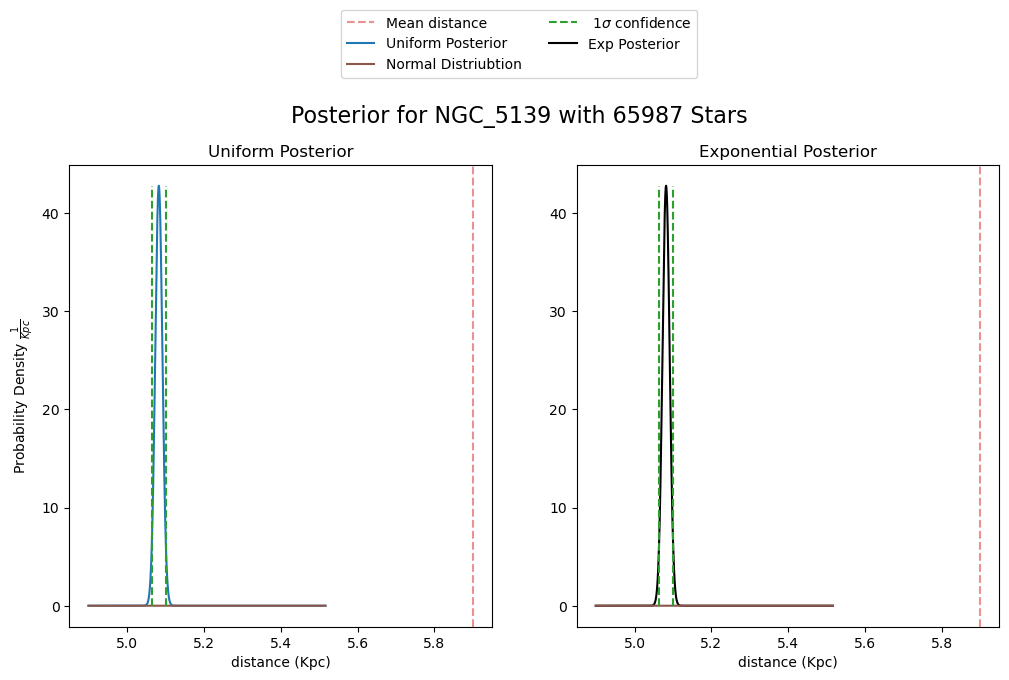

My cluster is NGC_5139
The Integrated posterior for a Normal Prior is 1.0 And for the Exponetial Prior is 1.0
Mode of Posterior pdf 5.081979822602951 Kpc
95% confidence interval for uniform prior = [5.06386324 5.1004283 ] Kpc
95% confidence interval for exponetial prior = [5.06381123 5.10037455] Kpc


In [27]:
def posterior(clusters, stars,cluster_name,samp, plotting, results):
    '''Calculate the posterior for distance to a cluster
    In log space
    From a random filtered cluster, sample its distance, mean and std dev
    use  Bayes' theorem to see if the data follows a gaussian

    The distance needs to be converted from parallax

    input: 
    cluster: pd dataframe of star clusters with more than 200 stars and low standard deviation
    star: pdf dataframe of the raw data
    
    Cluster_name - str Name of a cluster from cluster df
    samp- Boolean, if False sample all the stars if True sample 10 stars
    plotting- Boolean if true show the plot otherwise dont
    results - Boolean if true print the needed results otherwise dont

    variables
    dataset- all the data within stars of the randomly selected cluster
    parameters- get all the parameter space of the cluster to calculate the mean and std dev
    distance array - the distrance of the individual stars in the cluster
    lam_array - a sample of the distances 

    Pd_normal- the model evidence for a gaussian likelyhood and uniform prior
    Pd_exp- the model evidnece for a gaussian likelyhood and exponential prior
    
    '''
    #pick a random cluster from the cleaned dataset
    #rng = np.random.default_rng(rng_val) #for reproducability
    random_cluster = cluster_name
    #obtain all the data about the cluster
    #make a copy so that i dont get operation errors
    dataset = stars[stars['Name'] == random_cluster].copy()
    #gather all the parameters in the cluster 
    parameters = clusters.loc[random_cluster]
    #add offset to parallax units mas
    offset = 0.029 #mas 
    dataset['Plx'] = (dataset['Plx'] + offset) 
    #create a new column of distance to source
    dataset['Distance'] = 1/dataset['Plx'] # distance to star in kilo parsec
    #calculate the mean and std deviation after the offset
    mean_dist = dataset["Distance"].mean()
    std_dist = dataset['Distance'].std(numeric_only=True)
    ## Niek: the error on the mean is the standard deviation / sqrt(N)

    e_plx = dataset['e_Plx']
    #for the uniform distribution prior
    uniform_distro = mean_dist
    #make sure the distances are an numpy array
    # either sample all the stars or 10 stars
    if samp == False:        
        distance_array = dataset['Distance'].to_numpy()
        #distance_array = np.linspace(0.6/np.max(dataset["Plx"]), 1./np.min(dataset['Plx']), num=1000)
    elif samp == True:
         distance_array = np.random.choice(dataset['Distance'].to_numpy(),size=10)
    #calculate the normal distribution for a cluster P(D| theta)
    print(len(distance_array))
    #make a lambda array like that in episode 7 but for distance
    # lam_array = np.linspace(np.max([np.min(distance_array)/2,0.1]), np.max(distance_array)*2, num=1000) 
    ## Niek: I would choose a different name that is more informative, the lambda refers to a Poisson distribution parameter.
    std_errdist = np.std(dataset['Plx'])*mean_dist**2/np.sqrt(len(distance_array))
    lam_array = np.linspace(1/np.mean(dataset['Plx'])-7*std_errdist,1/np.mean(dataset['Plx'])+7*std_errdist,5000)
    # lam_array = np.linspace(np.max([1/(np.mean(dataset['Plx'])+15*np.std(dataset['Plx'])),0.02]),
    #                                np.min([np.max((distance_array)*2),10]),1000)
    print(lam_array)
    n_events = dataset["Plx"].to_numpy()
    #make a sample of random distributions around the distance to the cluster
    #loc is the mean and scale is the standard deviation

    #reshape the sample array
    reshape = n_events.reshape(len(n_events),1)
    plx_events = e_plx.to_numpy()
    reshape_eplx = plx_events.reshape(len(plx_events),1)

    #calculate the prior in logspace for each star and sum the total, convert back to normal space
    loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)
    likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
    #integrate the denominator
    Pd_normal = spint.simpson(likel_prior,x=lam_array)
    #posterior 
    normal_post = (likel_prior)/(Pd_normal)
    
    
    
    #repeat for the exponential prior call it "fancy" to aviod confusion with np.exp
    fancy_prior = realitstic_prior(d=lam_array)
    #copy and pasted the cod eabove and changed the prior
    fancy_loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(fancy_prior)
    fancy_likel_prior = np.exp(fancy_loglikel_prior-np.amax(fancy_loglikel_prior))
    
    Pd_fancy = spint.simpson(fancy_likel_prior,x=lam_array)
    #exponetial distro posterior
    fancy_post = (fancy_likel_prior)/Pd_fancy

    #do a check with a nomral distribution
    #assuming mean and std dev is given by one value
    normal_distribution_cluster = sps.norm.pdf(x=lam_array, loc=mean_dist, scale=std_dist)
    

    #check area under the posterior = 1
    total_norm_post = spint.simpson(normal_post,x =lam_array)
    total_fancy_post = spint.simpson(fancy_post, x=lam_array)
    
    post_result = "The Integrated posterior for a Normal Prior is " +str(total_norm_post) + " And for the Exponetial Prior is "+str(total_fancy_post)
    ## uniform prior,not normal
    
    #find the max posterior position
    #since they overlap i'll use the max of the exponential posterior
    #we also need it for assignment 4
    max_posterior = lam_array[np.argmax(fancy_post)]
    print(max_posterior)


    #confidence interval stuff
    #following phill's notes
    #for the uiform distiibution
    posterior_cdf_normal = spint.cumulative_trapezoid(normal_post,lam_array,initial=0)

    # plt.figure()
    # plt.plot(lam_array,normal_post)
    # plt.show()
    
    #invert the CDF
    # print(posterior_cdf_normal)
    posterior_ppf_normal = spinterp.interp1d(posterior_cdf_normal,lam_array)
    #define the confidence internval 
    int95_normal = posterior_ppf_normal([0.025,0.975])
    
    #Repeat for exponential
    posterior_cdf_fancy = spint.cumulative_trapezoid(fancy_post,lam_array,initial=0)
    #invert the CDF
    posterior_ppf_fancy= spinterp.interp1d(posterior_cdf_fancy,lam_array)
    #define the confidence internval 
    int95_fancy= posterior_ppf_fancy([0.025,0.975])


    #i asked chatgpt for this legend
    #fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    if plotting: #if true
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        n_stars = len(distance_array) #number of sampled stars
        fig.suptitle('Posterior for '+random_cluster+" with "+str(n_stars)+' Stars', fontsize=16) 
        #mean plot line
        axes[0].axvline(x=mean_dist, alpha=0.5, c='tab:red', linestyle='--', label='Mean distance')
        axes[1].axvline(x=mean_dist, alpha=0.5, c='tab:red', linestyle='--')
        #normal posterior plot
        axes[0].set_title("Uniform Posterior")
        axes[0].plot(lam_array, normal_post,label="Uniform Posterior")
        axes[0].set_ylabel(r"Probability Density $\frac{1}{Kpc}$")
        axes[0].set_xlabel("distance (Kpc)")
        axes[1].set_xlabel("distance (Kpc)")
        #exponetial prior
        axes[1].set_title("Exponential Posterior")
        axes[1].plot(lam_array, fancy_post,color='k',label="Exp Posterior")
        axes[0].plot(lam_array, normal_distribution_cluster,label="Normal Distriubtion",color='tab:brown')
        axes[1].plot(lam_array, normal_distribution_cluster,color='tab:brown')
        
        axes[0].vlines(int95_normal,ymin=0,ymax=np.max(normal_post),color='tab:green',linestyle='dashed', label= r" 1$\sigma$ confidence")
        axes[1].vlines(int95_normal,ymin=0,ymax=np.max(fancy_post),color='tab:green',linestyle='dashed',)
        #i asked chatgpt for the legend
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
        plt.show()
    if results: #if true
        print("My cluster is " + random_cluster)
        print(post_result)
        print("Mode of Posterior pdf", max_posterior,"Kpc")
        print(r'95% confidence interval for uniform prior =',int95_normal,"Kpc")
        print(r'95% confidence interval for exponetial prior =',int95_fancy, "Kpc")

    
    return max_posterior 
# post_result = posterior(cluster_analysis, stars,'Bochum_10',samp=False,plotting=True,results=True)
post_result = posterior(cluster_analysis, stars,'NGC_5139',samp=False,plotting=True,results=True)



As part of requirement of bayes theorem, the  guess of the model input should not be modified, 
Can perfectly overlap since the weight of your guess diminishes for more and more datapoints <br>
Below i run the same code only for 10 random stars

10
[ 0.19713819  0.20695087  0.21676354  0.22657622  0.23638889  0.24620156
  0.25601424  0.26582691  0.27563959  0.28545226  0.29526494  0.30507761
  0.31489029  0.32470296  0.33451564  0.34432831  0.35414098  0.36395366
  0.37376633  0.38357901  0.39339168  0.40320436  0.41301703  0.42282971
  0.43264238  0.44245505  0.45226773  0.4620804   0.47189308  0.48170575
  0.49151843  0.5013311   0.51114378  0.52095645  0.53076912  0.5405818
  0.55039447  0.56020715  0.57001982  0.5798325   0.58964517  0.59945785
  0.60927052  0.6190832   0.62889587  0.63870854  0.64852122  0.65833389
  0.66814657  0.67795924  0.68777192  0.69758459  0.70739727  0.71720994
  0.72702261  0.73683529  0.74664796  0.75646064  0.76627331  0.77608599
  0.78589866  0.79571134  0.80552401  0.81533668  0.82514936  0.83496203
  0.84477471  0.85458738  0.86440006  0.87421273  0.88402541  0.89383808
  0.90365076  0.91346343  0.9232761   0.93308878  0.94290145  0.95271413
  0.9625268   0.97233948  0.98215215  0.99196483 

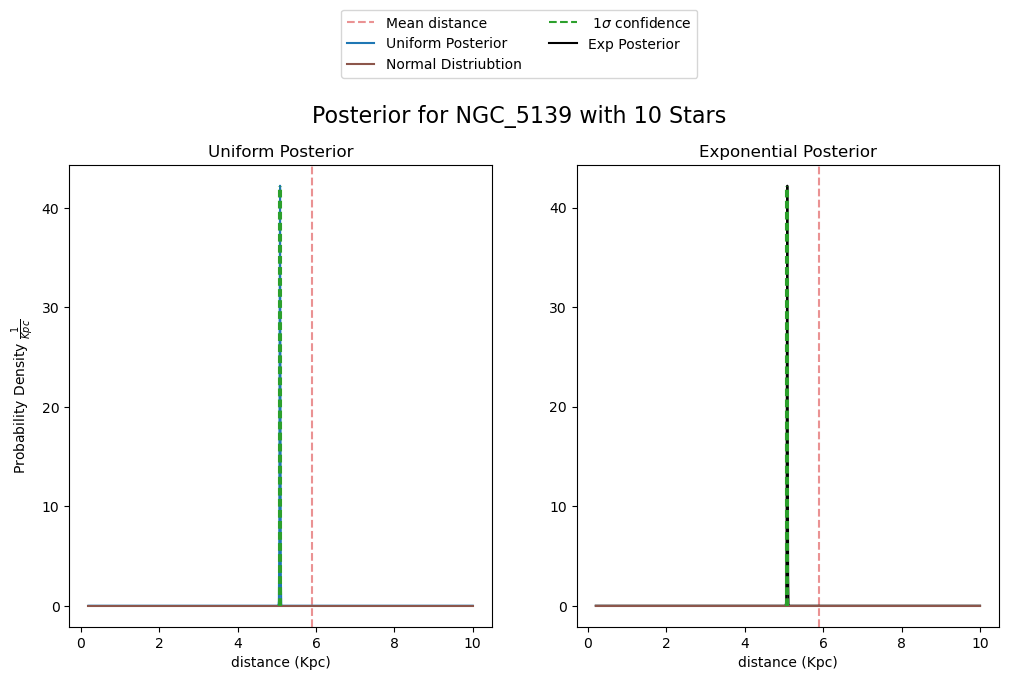

My cluster is NGC_5139
The Integrated posterior for a Normal Prior is 1.0 And for the Exponetial Prior is 1.0
Mode of Posterior pdf 5.083850084438582 Kpc
95% confidence interval for uniform prior = [5.06049517 5.10223683] Kpc
95% confidence interval for exponetial prior = [5.06041568 5.10221319] Kpc


In [19]:
# samp_post_result = posterior(cluster_analysis, stars,'Berkeley_36',samp=True,plotting=True,results=True)
samp_post_result = posterior(cluster_analysis, stars,'NGC_5139',samp=True,plotting=True,results=True)

# Q3 Discussion
The effect of smaller sample size shifts the distributions and increases the spread of the confidence interval. you can see this by running samp_post_result again and again

*Niek: not only that, the prior also becomes more improtant for smaller sample sizes, although your code does not seem to return that. Please note the difference between the prior and the posterior: the prior is e.g. uniform, the posterior usually is not. Any difference in the posteriors for different priors would be much more clear if you plot them in the same panel. You could also plot the difference between the posteriors and see that the prior actually changes the mode of the pdf.*


# Q4
Now repeat the Bayesian distance calculation for all clusters used in the correlation sample in Task 2,
using only the more realistic, constant density exponentially decreasing prior. You should obtain the
distance estimate for each cluster from the maximum posterior probability of d. Then, use your
distances to correct these 4 observed quantities to the values they would have at a fixed distance of 1
kpc: σ& , σpos , δ̅, σ- . For these four corrected quantities, show the scatter-matrix plot and perform
Pearson and Spearman correlation tests. Comment on your results and how they differ compared to
what you obtained in Task 1 and 2 for the same quantities.

## Method
Run the Posterior() function for each cluster and all the stars in the cluster<br>
Calculate the distance and return it to a new dataframe matching the cluster name <br>
The Max distance is the correcting factor, multiply each required parameter by the correction factor <br>
## Assumptions
The distance is given as the mode of the cluster <br>
Neglect the overflow errors, assume the number of errored stars is small compared to the total sample <br>

In [14]:
cluster_analysis.columns

Index(['Counts', 'Mean plx', 'Plx std', 'Cluster Size', 'Mean PM', 'PM Std'], dtype='object')

In [28]:
cluster_names = cluster_analysis.index
# cluster_names = ['Berkeley_36']

bayesian_distance = pd.DataFrame()
corrected_terms = cluster_analysis.copy()
#for each cluster in the dataset, calculate the bayesian distance
i=0
for unique_cluster in cluster_names:
    print(i,unique_cluster)
    i+=1
    max_posterior = posterior(cluster_analysis, stars,unique_cluster,samp=False,plotting=False,results=False)
    #df.append is outdated use pd.concat
    new_row = pd.DataFrame({'Name' : unique_cluster, 'Distance (Kpc)' : max_posterior}, index=[0])
    bayesian_distance = pd.concat([bayesian_distance, new_row], ignore_index=True)

## Niek: I run into an error here, the bounds are incorrect.
## ValueError: A value (0.975) in x_new is above the interpolation range's maximum value (0.7500032683895418).
## It works if I use Bochum_10, but not for some other clusters, it seems.


0 BH_131
352
[5.36372131 5.36412395 5.36452659 ... 7.37571143 7.37611407 7.37651671]
6.251541646281309
1 BH_140
3789
[4.2363249  4.23639006 4.23645521 ... 4.56189774 4.56196289 4.56202804]
4.2391265101802675
2 BH_66
407
[5.59611508 5.59645443 5.59679379 ... 7.29185907 7.29219842 7.29253777]
6.401398347147257
3 Berkeley_36
678
[4.03202178 4.03206585 4.03210992 ... 4.25222334 4.25226741 4.25231147]
4.0320217815315615
4 Berkeley_39
1203
[3.20914019 3.20940302 3.20966584 ... 4.52248625 4.52274907 4.5230119 ]
3.842553036274917
5 Berkeley_43
472
[3.11539562 3.11562659 3.11585757 ... 4.26956222 4.2697932  4.27002417]
3.687974970353497
6 Bochum_1
223
[3.78758554 3.78775478 3.78792402 ... 4.63327171 4.63344095 4.63361019]
4.024012114629465
7 Bochum_10
292
[2.33611149 2.33613225 2.33615302 ... 2.43985312 2.43987388 2.43989464]
2.378588051054282
8 Collinder_110
1523
[2.0761053  2.07613915 2.076173   ... 2.24526663 2.24530048 2.24533434]
2.135110340501399
9 Collinder_261
3071
[2.55206131 2.5521031

/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


8.04012608831755
17 FoF_145
645
[1.73922284 1.73925073 1.73927861 ... 1.87855377 1.87858165 1.87860954]
1.7819952352595725
18 Gulliver_15
202
[1.77936885 1.77941954 1.77947023 ... 2.03267409 2.03272478 2.03277547]
1.8354336064430887
19 HSC_1181
491
[3.67001925 3.67009882 3.6701784  ... 4.06766778 4.06774736 4.06782694]
3.8167600713155965
20 HSC_1355
532
[3.65504777 3.65550991 3.65597204 ... 5.96432749 5.96478962 5.96525175]
4.892178410237741
21 HSC_1593
394
[4.18413364 4.18422328 4.18431292 ... 4.63205599 4.63214563 4.63223527]
4.421137181971727
22 HSC_179
444
[5.67876553 5.67948422 5.6802029  ... 9.27002522 9.2707439  9.27146258]
7.547341713616359
23 HSC_186
246
[2.73451301 2.73459187 2.73467073 ... 3.12858666 3.12866552 3.12874439]
2.9491755041381684
24 HSC_1890
481
[5.26361691 5.26389224 5.26416756 ... 6.63941883 6.63969416 6.63996948]
6.072248137959189
25 HSC_2016
396
[5.34390727 5.34404272 5.34417818 ... 6.02077738 6.02091284 6.02104829]
5.756368642534744
26 HSC_2061
220
[4.418214

/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


430
[4.60588491 4.60606039 4.60623586 ... 5.4827336  5.48290907 5.48308455]
4.998948961840325
29 HSC_2363
244
[5.12513268 5.12542568 5.12571867 ... 6.5892185  6.58951149 6.58980448]
5.936723179787758
30 HSC_2667
996
[3.40460593 3.40474343 3.40488094 ... 4.09171878 4.09185628 4.09199379]
3.4046059279660197
31 HSC_280
2455
[4.53852938 4.5385995  4.53866962 ... 4.88893061 4.88900074 4.88907086]
4.538529377556085
32 HSC_287
1263
[4.21535301 4.21578573 4.21621845 ... 6.37764369 6.37807641 6.37850912]
5.0673742922000615
33 HSC_2878
766
[ 6.88141939  6.88209722  6.88277505 ... 10.26854026 10.26921809
 10.26989592]
8.37671429525122
34 HSC_2879
1457
[3.32248302 3.32254404 3.32260506 ... 3.62739337 3.62745439 3.62751541]
3.446900114225712
35 HSC_290
586
[4.34233381 4.34294136 4.3435489  ... 7.37823703 7.37884458 7.37945212]
5.49606209052037
36 HSC_2939
206
[3.42995509 3.43009788 3.43024068 ... 4.14351149 4.14365429 4.14379708]
3.8629154649618314
37 HSC_2950
242
[2.79751499 2.79760919 2.79770339 

/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


4.410060045435184
90 NGC_3532
3414
[0.47143079 0.47143231 0.47143382 ... 0.4790083  0.47900982 0.47901134]
0.4720085446680163
91 NGC_3603
215
[5.96406821 5.96449364 5.96491906 ... 8.08992227 8.0903477  8.09077313]
6.969775436393792
92 NGC_362


/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


8941
[nan nan nan ... nan nan inf]


/tmp/ipykernel_13224/297392649.py:4: RuntimeWarning: invalid value encountered in multiply
  return (d**2)*np.exp(-d/L)
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in subtract
  x = np.asarray((x - loc)/scale, dtype=dtyp)


nan
93 NGC_3766
766
[1.94278181 1.94279392 1.94280603 ... 2.00329823 2.00331034 2.00332245]
1.9665063737940194
94 NGC_4372
7642
[2.49667448 2.49775099 2.4988275  ... 7.87600404 7.87708055 7.87815707]
5.308523350122369
95 NGC_4590
3094
[6.66050457 6.66089522 6.66128587 ... 8.61260221 8.61299286 8.61338352]
8.355551930257914
96 NGC_4755
724
[1.95184988 1.9518649  1.95187991 ... 2.02687879 2.02689381 2.02690882]
2.0079301261959617
97 NGC_4815
886
[3.06066451 3.06072217 3.06077983 ... 3.34879488 3.34885255 3.34891021]
3.2027404052886954
98 NGC_4833
3155
[5.77860115 5.77883754 5.77907394 ... 6.95985829 6.96009468 6.96033107]
6.127044819624428
99 NGC_5139
65987
[4.89886885 4.89899232 4.89911579 ... 5.51586517 5.51598864 5.51611212]
5.081979822602951
100 NGC_5272
9629
[7.42600284 7.4261891  7.42637536 ... 8.35673935 8.35692561 8.35711187]


/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


8.357111868158606
101 NGC_5381
724
[2.29429401 2.29433128 2.29436856 ... 2.48056174 2.48059901 2.48063629]
2.3880802009898594
102 NGC_559
887
[2.52846508 2.5285331  2.52860111 ... 2.86832862 2.86839663 2.86846465]
2.7763743477432286
103 NGC_5617
404
[2.17013372 2.1701538  2.17017388 ... 2.27049184 2.27051193 2.27053201]
2.2176316086619825
104 NGC_5822
804
[0.80577582 0.80578011 0.8057844  ... 0.82721238 0.82721666 0.82722095]
0.8128198088191001
105 NGC_5823
677
[1.71246522 1.7124821  1.71249899 ... 1.79684406 1.79686094 1.79687783]
1.7561659234425173
106 NGC_5897
2472
[-0.53557016 -0.53250376 -0.52943737 ... 14.78720737 14.79027376
 14.79334016]


/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


7.648639010377108
107 NGC_5904
17691
[5.69736141 5.69736451 5.69736761 ... 5.71285617 5.71285927 5.71286237]
5.712862368166975
108 NGC_5925
473
[1.36263677 1.36264937 1.36266198 ... 1.42560948 1.42562208 1.42563469]
1.3911931375518247
109 NGC_5927
1810
[5.37079434 5.37140137 5.37200841 ... 8.40414529 8.40475233 8.40535936]
8.02171361303558
110 NGC_6067
1149
[1.9638301  1.96384502 1.96385995 ... 2.03842647 2.0384414  2.03845633]
1.9997474221158147
111 NGC_6121
22191
[1.71212752 1.71214674 1.71216597 ... 1.8081871  1.80820632 1.80822555]
1.7739693586744123
112 NGC_6124
1671
[0.61073669 0.61073918 0.61074166 ... 0.62317031 0.6231728  0.62317529]
0.6157355176648903
113 NGC_6167
2657
[1.41590147 1.41590797 1.41591447 ... 1.44837471 1.44838121 1.44838771]
1.4228419204852167
114 NGC_6171
983
[4.2089769  4.20938428 4.20979167 ... 6.24466767 6.24507505 6.24548243]
5.320316588033433
115 NGC_6192
774
[1.56838738 1.56840781 1.56842824 ... 1.67045375 1.67047417 1.6704946 ]
1.6223924803752712
116 NG

/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/tmp/ipykernel_13224/297392649.py:4: RuntimeWarning: invalid value encountered in multiply
  return (d**2)*np.exp(-d/L)
/home/skikk/miniforge3/envs/test_env/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in subtract
  x = np.asarray((x - loc)/scale, dtype=dtyp)


nan
118 NGC_6218
7248
[4.42006197 4.42008105 4.42010012 ... 4.51539054 4.51540962 4.5154287 ]
4.515428695617103
119 NGC_6231
646
[1.54083826 1.54084968 1.54086109 ... 1.59787772 1.59788914 1.59790055]
1.5798766759440923
120 NGC_6242
786
[1.22913734 1.22914889 1.22916043 ... 1.28682979 1.28684133 1.28685288]
1.2583472463136058
121 NGC_6254
4616
[-11.59034931 -11.58380323 -11.57725714 ...  21.12043129  21.12697737
  21.13352345]
4.958150458157771
122 NGC_6259
2188
[2.19210971 2.19212876 2.19214781 ... 2.28732304 2.28734209 2.28736114]
2.216441789215394
123 NGC_6266
1288
[-1.71925217 -1.71628354 -1.7133149  ... 13.11501908 13.11798772
 13.12095635]
5.901234980488001
124 NGC_6273
2351
[5.092404   5.09291294 5.09342189 ... 7.63559711 7.63610606 7.636615  ]


/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


7.113929524619804
125 NGC_6341
5161
[7.46135564 7.46135895 7.46136226 ... 7.47789652 7.47789983 7.47790315]
7.477903145090914
126 NGC_6352
2244
[3.89060485 3.89108494 3.89156503 ... 6.28959992 6.29008    6.29056009]
5.382715450954294
127 NGC_6362
4595
[6.77031851 6.77081422 6.77130993 ... 9.24738479 9.2478805  9.24837621]
7.559489917067252
128 NGC_6366
3753
[3.07640836 3.07659129 3.07677422 ... 3.99049805 3.99068098 3.9908639 ]
3.6431183587496814
129 NGC_6388
1082
[ 2.35242933  2.35552478  2.35862022 ... 17.82037758 17.82347302
 17.82656847]
11.196121172820067
130 NGC_6397
27910
[2.00831707 2.00842452 2.00853197 ... 2.54524189 2.54534934 2.54545678]
2.3639746942222346
131 NGC_6402
1337
[6.86092755 6.86102871 6.86112987 ... 7.36642611 7.36652727 7.36662843]
7.3666284275107925
132 NGC_6451
577
[2.66214128 2.66218543 2.66222957 ... 2.88272565 2.88276979 2.88281394]
2.7491919880230493
133 NGC_6475
1427
[0.27549665 0.27549754 0.27549842 ... 0.27990513 0.27990601 0.27990689]
0.27685792617676

/tmp/ipykernel_13224/1507274202.py:76: RuntimeWarning: invalid value encountered in log
  loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/lam_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)


11.388765827223096
156 NGC_7099
2202
[ 1.25387594  1.25596973  1.25806352 ... 11.71655688 11.71865068
 11.72074447]
7.298654784315673
157 NGC_7654
1190
[1.55077415 1.55078561 1.55079708 ... 1.60806194 1.60807341 1.60808487]
1.5698739009376177
158 NGC_7789
4125
[1.94248885 1.94250172 1.94251458 ... 2.00678559 2.00679846 2.00681133]
1.959576316717417
159 NGC_869
403
[2.27598077 2.27599504 2.27600932 ... 2.34732383 2.34733811 2.34735238]
2.296825446597444
160 NGC_884
287
[2.27722632 2.27724278 2.27725925 ... 2.3594947  2.35951117 2.35952763]
2.308770490283666
161 OC_0035
218
[2.83111592 2.83124093 2.83136595 ... 3.45580189 3.4559269  3.45605191]
3.082265432332721
162 OC_0470
415
[0.38679619 0.38679717 0.38679816 ... 0.39173094 0.39173193 0.39173292]
0.3889826089223589
163 OC_0473
246
[ 8.43785827  8.4388724   8.43988653 ... 13.50548245 13.50649658
 13.50751072]
10.8048454274004
164 OC_0684
382
[1.06176164 1.06176887 1.0617761  ... 1.09788444 1.09789167 1.0978989 ]
1.074845943577221
165 Pi

In [29]:
cluster_analysis.Counts

Name
BH_131         227
BH_140         338
BH_66          355
Berkeley_36    217
Berkeley_39    211
              ... 
UBC_461        231
UBC_517        256
UBC_600        390
UFMG_2         212
UFMG_38        246
Name: Counts, Length: 198, dtype: int64

In [30]:
terms_to_correct = cluster_analysis.copy().to_numpy()# make a copy of the clusters dataframe to avoid warnings

In [31]:
terms_to_correct[:,5] #index 1 is mean plx, up to index5 pm std
corrector = bayesian_distance['Distance (Kpc)'].to_numpy()

corrected_plx = terms_to_correct[:,1] * corrector

#make a dataframe of the corrected terms, ignore counts
#correct for  plx std, cluster pos, mean pm and pm std

corrected_terms = pd.DataFrame({
    "Name" : cluster_analysis.index,
    "Counts" : cluster_analysis.Counts,
    "Mean plx" : terms_to_correct[:,1], # dont change
    "Plx std" : terms_to_correct[:,2] * corrector,
    "Cluster Size" : terms_to_correct[:,3] * corrector,
    "Mean PM" : terms_to_correct[:,4] * corrector,
    "PM Std" : terms_to_correct[:,5] * corrector

})
print("Corrected Dataframe")
corrected_terms

Corrected Dataframe


,Name,Counts,Mean plx,Plx std,Cluster Size,Mean PM,PM Std
Name,,,,,,,
BH_131,BH_131,227,0.125637,0.288906,1.385840,40.865248,0.965265
BH_140,BH_140,338,0.190195,0.184345,0.540165,63.150464,0.549583
BH_66,BH_66,355,0.123089,0.287822,1.157614,35.019111,1.469078
Berkeley_36,Berkeley_36,217,0.217359,0.265597,0.254996,7.934621,0.400737
Berkeley_39,Berkeley_39,211,0.226982,0.147127,0.175370,9.112382,0.263781
...,...,...,...,...,...,...,...
UBC_461,UBC_461,231,0.298768,0.095241,1.256607,12.279173,0.329283
UBC_517,UBC_517,256,0.405671,0.051943,1.641659,13.020032,0.291976
UBC_600,UBC_600,390,0.171171,0.190435,3.474084,5.737333,0.646598


# Make the scatter matrix  (incorrect one see below)
this one is incorrect i have to move to logspace, i just wanted to see if my function could work

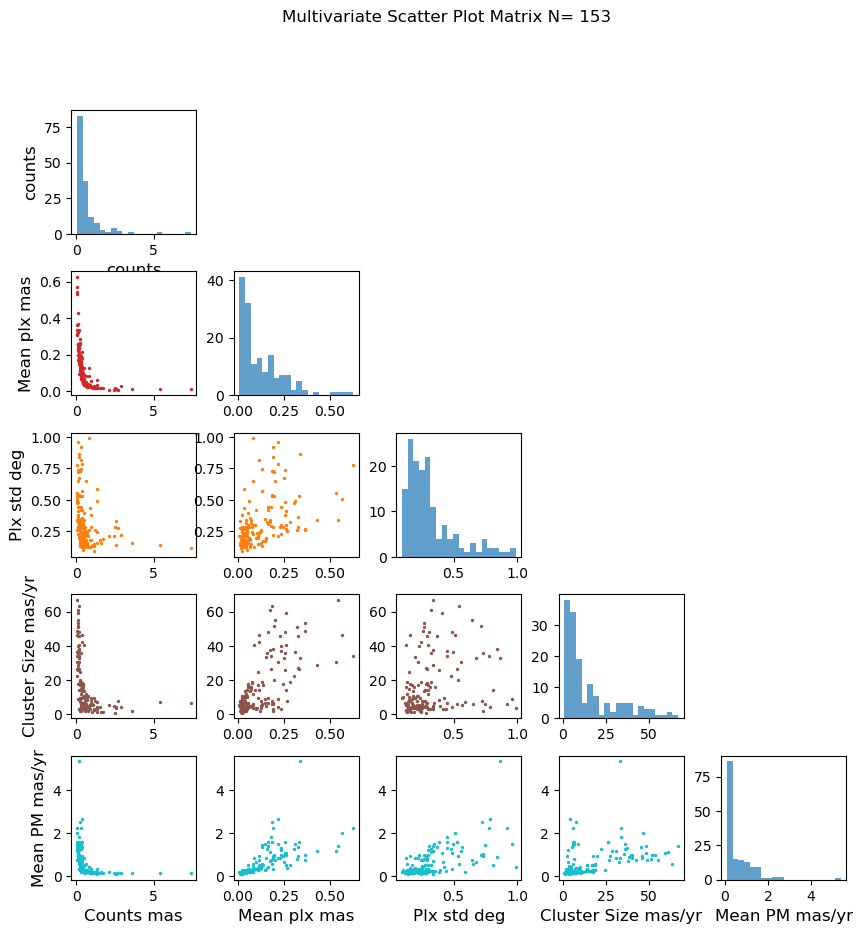

In [32]:
test = scatter_matrix(corrected_terms) 

# The Correct Scatter Matrix

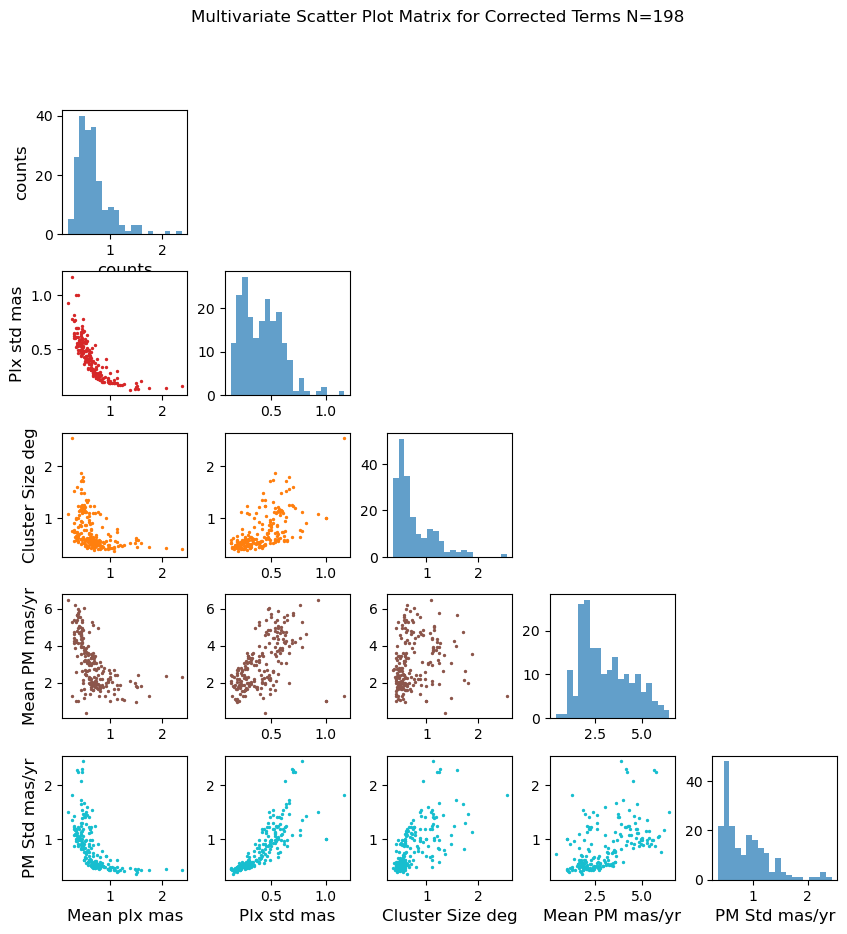

In [33]:
cluster = corrected_terms.fillna(1) # i have some NaN values in my dataframe, not sure how to fix
#replaced these with one
## Niek:  this is generally not a good approach. It could have to do with the range of distances you're calculating the 
## posterior for, which I have corrected above.
#skip name and counts column
labels= cluster.columns[2:] 
units = ['mas', 'mas','deg','mas/yr','mas/yr'] # add units to the labels
data = [cluster['Mean plx'], cluster['Plx std'], cluster['Cluster Size'], cluster['Mean PM'], cluster['PM Std']]
ndims = len(data)
fig, axes = plt.subplots(5,5,figsize=(10,10))
fig.subplots_adjust(wspace=0.3,hspace=0.3)
fig.suptitle("Multivariate Scatter Plot Matrix for Corrected Terms N="+str(len(cluster)))
colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:brown', 'tab:cyan']
for i in range(ndims): ## y dimension of grid
    for j in range(ndims): ## x dimension of grid
        if i == j:
            axes[i,j].hist(np.exp(np.log10(data[i])), bins=20,alpha=0.7,)
        elif i > j:
            axes[i,j].scatter(np.exp(np.log10(data[j])), np.exp(np.log10(data[i])),s=2, color=colors[i])
        else:
            axes[i,j].axis('off')
        if j == 0:
            if i == j:
                axes[i,j].set_xlabel('counts',fontsize=12)
                axes[i,j].set_ylabel('counts',fontsize=12)
            else:
                axes[i,j].set_ylabel(labels[i]+' '+units[i],fontsize=12)
        if i == 4:
            axes[i,j].set_xlabel(labels[j]+' '+units[j],fontsize=12)    
#fig.legend(labels=labels)
plt.show()

# Correlation Tests and Comments

In [34]:
corrected_terms.columns

Index(['Name', 'Counts', 'Mean plx', 'Plx std', 'Cluster Size', 'Mean PM',
       'PM Std'],
      dtype='object')

In [35]:
for i, cols1 in enumerate(cluster.columns[1:]): #skip counts column
    for j, cols2 in enumerate(cluster.columns[1:]):
        if i < j :
            pearson_corr, pearson_p_value, spearman_corr, spearman_p_value = correlation(cluster[cols1], cluster[cols2])
            print(f"{cols1} vs {cols2}: Pearson Correlation = {pearson_corr:.4f} (p-value = {pearson_p_value}), Spearman Correlation = {spearman_corr:.4f} (p-value = {spearman_p_value})")


Counts vs Mean plx: Pearson Correlation = -0.1325 (p-value = 0.06284798301708329), Spearman Correlation = -0.2838 (p-value = 5.076368326195594e-05)
Counts vs Plx std: Pearson Correlation = 0.2308 (p-value = 0.0010726391737368723), Spearman Correlation = 0.3701 (p-value = 8.030698411733675e-08)
Counts vs Cluster Size: Pearson Correlation = 0.2019 (p-value = 0.004330062980933665), Spearman Correlation = 0.3726 (p-value = 6.45485435850234e-08)
Counts vs Mean PM: Pearson Correlation = 0.2243 (p-value = 0.00148907588201757), Spearman Correlation = 0.2516 (p-value = 0.0003489059570696495)
Counts vs PM Std: Pearson Correlation = 0.4186 (p-value = 8.44174845739437e-10), Spearman Correlation = 0.4952 (p-value = 1.195520962988313e-13)
Mean plx vs Plx std: Pearson Correlation = -0.3745 (p-value = 5.48619036940409e-08), Spearman Correlation = -0.9198 (p-value = 1.4171790985565736e-81)
Mean plx vs Cluster Size: Pearson Correlation = -0.2258 (p-value = 0.001378532405750907), Spearman Correlation = -

# Q4 Explanation and Assumptions
Visually There are already more Correlations compared to the first test. such as all the Cloumns with Mean Plx and plx std.

But for my p values that are low are insaneley low which is concerning, i also have to consider what's the affect of converting NaN values to unity.

*Niek: that might have an effect, but what assumptions go into the test? Are those valid?*

## Spearman $\rho$
Values with a monotonic correlation and high confidence 
<ol>
  <li>Plx std and PM std</li>
    <li>Plx std and mean PM</li>
    <li>Cluster Size and PM std</li>
    <li>Cluster Size and Mean PM</li>
    <li>Mean PM and PM std</li>
</ol>

## Pearson R
Values with a linear correlation and high confidence
<ol>
  <li>Mean plx and  Plx std</li>
  <li>Mean plx and Mean PM </li>
    <li>Mean plx and PM std</li>
    <li>Plx std and Cluster size</li>
    <li>Plx std and PM std</li>
    <li>Cluster size and mean PM</li>
    <li>Cluster size and PM std</li>
    <li>Mean PM and PM std</li>
</ol>

*Niek: how do you interpret these findings? What do you make of the difference in p-values when correcting for distance?*
